# Project 1- Cab Booking Cancellation-YourCabs

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset =pd.read_csv("C:/Users/rushi/OneDrive/Desktop/Face prep learning/2Face Prep Projects/1 Project_1/YourCabs_training.csv")

In [3]:
dataset.head()

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
0,132512,22177,28,NaN,2,83.0,448.0,NaN,NaN,1/1/2013 2:00,NaN,0,0,1/1/2013 1:39,12.924150,77.672290,12.927320,77.635750,0
1,132513,21413,12,NaN,2,1010.0,540.0,NaN,NaN,1/1/2013 9:00,NaN,0,0,1/1/2013 2:25,12.966910,77.749350,12.927680,77.626640,0
2,132514,22178,12,NaN,2,1301.0,1034.0,NaN,NaN,1/1/2013 3:30,NaN,0,0,1/1/2013 3:08,12.937222,77.626915,13.047926,77.597766,0
3,132515,13034,12,NaN,2,768.0,398.0,NaN,NaN,1/1/2013 5:45,NaN,0,0,1/1/2013 4:39,12.989990,77.553320,12.971430,77.639140,0
4,132517,22180,12,NaN,2,1365.0,849.0,NaN,NaN,1/1/2013 9:00,NaN,0,0,1/1/2013 7:53,12.845653,77.677925,12.954340,77.600720,0


In [4]:
dataset.shape

(43431, 19)

In [5]:
dataset.describe()

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,to_date,online_booking,mobile_site_booking,from_lat,from_long,to_lat,to_long,Car_Cancellation
count,43431.000000,43431.000000,43431.00000,7550.000000,43431.000000,43343.000000,34293.000000,16345.000000,1588.000000,25541.000000,43431.000000,43431.000000,43338.000000,43338.000000,34293.000000,34293.000000,43431.000000
mean,159206.473556,30739.198153,25.71723,2.030066,2.137252,714.544494,669.490917,14.915081,68.537783,41507.974840,0.351592,0.043241,12.982461,77.636255,13.026648,77.640595,0.072114
std,15442.386279,10996.476709,26.79825,1.461756,0.437712,419.883553,400.638225,1.165306,49.880732,305.144945,0.477473,0.203402,0.085933,0.059391,0.113487,0.064045,0.258680
min,132512.000000,16.000000,1.00000,1.000000,1.000000,2.000000,2.000000,1.000000,4.000000,25569.020830,0.000000,0.000000,12.776630,77.386930,12.776630,77.386930,0.000000
25%,145778.000000,24614.000000,12.00000,1.000000,2.000000,393.000000,393.000000,15.000000,32.000000,41480.521110,0.000000,0.000000,12.926450,77.593661,12.951850,77.582030,0.000000
50%,159248.000000,31627.000000,12.00000,2.000000,2.000000,590.000000,541.000000,15.000000,49.000000,41517.761550,0.000000,0.000000,12.968887,77.635750,12.982750,77.645030,0.000000
75%,172578.500000,39167.000000,24.00000,2.000000,2.000000,1089.000000,1054.000000,15.000000,108.000000,41558.914630,1.000000,0.000000,13.007750,77.688900,13.199560,77.706880,0.000000
max,185941.000000,48730.000000,91.00000,7.000000,3.000000,1403.000000,1403.000000,31.000000,203.000000,41678.275680,1.000000,1.000000,13.366072,77.786420,13.366072,77.786420,1.000000


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43431 entries, 0 to 43430
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   43431 non-null  int64  
 1   user_id              43431 non-null  int64  
 2   vehicle_model_id     43431 non-null  int64  
 3   package_id           7550 non-null   float64
 4   travel_type_id       43431 non-null  int64  
 5   from_area_id         43343 non-null  float64
 6   to_area_id           34293 non-null  float64
 7   from_city_id         16345 non-null  float64
 8   to_city_id           1588 non-null   float64
 9   from_date            43431 non-null  object 
 10  to_date              25541 non-null  float64
 11  online_booking       43431 non-null  int64  
 12  mobile_site_booking  43431 non-null  int64  
 13  booking_created      43431 non-null  object 
 14  from_lat             43338 non-null  float64
 15  from_long            43338 non-null 

In [7]:
dataset.isnull().any()

id                     False
user_id                False
vehicle_model_id       False
package_id              True
travel_type_id         False
from_area_id            True
to_area_id              True
from_city_id            True
to_city_id              True
from_date              False
to_date                 True
online_booking         False
mobile_site_booking    False
booking_created        False
from_lat                True
from_long               True
to_lat                  True
to_long                 True
Car_Cancellation       False
dtype: bool

# Filling NaN Values

In [8]:
dataset['package_id'] = dataset['package_id'].fillna(dataset['package_id'].median())
dataset['from_area_id'] = dataset['from_area_id'].fillna(dataset['from_area_id'].median())
dataset['to_area_id'] = dataset['to_area_id'].fillna(dataset['to_area_id'].median())
dataset['from_city_id'] = dataset['from_city_id'].fillna(dataset['from_city_id'].median())
dataset['to_city_id'] = dataset['to_city_id'].fillna(dataset['to_city_id'].median())
dataset['to_date'] = dataset['to_date'].fillna(dataset['to_date'].median())
dataset['from_lat'] = dataset['from_lat'].fillna(dataset['from_lat'].median())
dataset['from_long'] = dataset['from_long'].fillna(dataset['from_long'].median())
dataset['to_lat'] = dataset['to_lat'].fillna(dataset['to_lat'].median())
dataset['to_long'] = dataset['to_long'].fillna(dataset['to_long'].median())

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43431 entries, 0 to 43430
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   43431 non-null  int64  
 1   user_id              43431 non-null  int64  
 2   vehicle_model_id     43431 non-null  int64  
 3   package_id           43431 non-null  float64
 4   travel_type_id       43431 non-null  int64  
 5   from_area_id         43431 non-null  float64
 6   to_area_id           43431 non-null  float64
 7   from_city_id         43431 non-null  float64
 8   to_city_id           43431 non-null  float64
 9   from_date            43431 non-null  object 
 10  to_date              43431 non-null  float64
 11  online_booking       43431 non-null  int64  
 12  mobile_site_booking  43431 non-null  int64  
 13  booking_created      43431 non-null  object 
 14  from_lat             43431 non-null  float64
 15  from_long            43431 non-null 

In [10]:
dataset.tail()

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
43426,185937,14364,12,2.0,2,1147.0,452.0,15.0,49.0,11/24/2013 18:00,41602.82020,1,0,11/24/2013 14:25,13.03064,77.64910,12.952780,77.59088,0
43427,185938,48727,12,2.0,2,393.0,466.0,15.0,49.0,11/26/2013 1:00,41604.08037,1,0,11/24/2013 14:30,13.19956,77.70688,13.017436,77.64458,0
43428,185939,48729,12,1.0,3,974.0,541.0,15.0,49.0,11/24/2013 18:30,41602.97917,0,0,11/24/2013 14:35,13.07557,77.55904,12.982750,77.64503,0
43429,185940,30724,87,2.0,2,1263.0,542.0,15.0,49.0,11/24/2013 16:00,41602.69495,0,0,11/24/2013 14:43,12.96897,77.59456,12.938230,77.62289,0
43430,185941,48730,12,2.0,2,689.0,393.0,15.0,49.0,11/25/2013 5:00,41603.25385,0,1,11/24/2013 14:50,12.97672,77.64927,13.199560,77.70688,0


# Extracting date and time from timestamp

In [11]:
dataset['from_date_dt'] = pd.to_datetime(dataset['from_date']).dt.strftime('%m/%d/%Y')
dataset['from_time_tm'] = pd.to_datetime(dataset['from_date']).dt.strftime('%H:%M')

dataset['booking_created_dt'] = pd.to_datetime(dataset['booking_created']).dt.strftime('%m/%d/%Y')
dataset['booking_created_tm'] = pd.to_datetime(dataset['booking_created']).dt.strftime('%H:%M')

# Extracting day and month from timestamp

In [12]:
dataset['from_date_day'] = pd.to_datetime(dataset['from_date_dt']).dt.day_name()
dataset['booking_created_day'] = pd.to_datetime(dataset['booking_created_dt']).dt.day_name()

dataset['from_date_month'] = pd.to_datetime(dataset['from_time_tm']).dt.month_name()
dataset['booking_created_month'] = pd.to_datetime(dataset['booking_created_dt']).dt.month_name()

Creating Weekend And weekday from day data

In [13]:
dataset['from_date_week'] = np.where((dataset['from_date_day']=='Saturday') | (dataset['from_date_day']=='Sunday'),'Weekend', 'Weekday')

dataset['booking_created_week'] = np.where((dataset['booking_created_day']=='Saturday') | (dataset['booking_created_day']=='Sunday'),'Weekend','Weekday')

Splitting Day into Session

In [14]:
per = [(pd.to_datetime(dataset['from_time_tm']).dt.hour.between(5, 8)),
       (pd.to_datetime(dataset['from_time_tm']).dt.hour.between(9, 12)),
       (pd.to_datetime(dataset['from_time_tm']).dt.hour.between(13, 16)),
       (pd.to_datetime(dataset['from_time_tm']).dt.hour.between(17, 20)),
       (pd.to_datetime(dataset['from_time_tm']).dt.hour.between(21, 24)) | (pd.to_datetime(dataset['from_time_tm']).dt.hour==0),
       (pd.to_datetime(dataset['from_time_tm']).dt.hour.between(1, 4))]

periods = ['Early Morning', 'Morning', 'Afternoon', 'Evening', 'Night', 'Late Night']

dataset['from_date_session'] = np.select(per, periods)

In [15]:
per = [(pd.to_datetime(dataset['booking_created_tm']).dt.hour.between(5, 8)),
       (pd.to_datetime(dataset['booking_created_tm']).dt.hour.between(9, 12)),
       (pd.to_datetime(dataset['booking_created_tm']).dt.hour.between(13, 16)),
       (pd.to_datetime(dataset['booking_created_tm']).dt.hour.between(17, 20)),
       (pd.to_datetime(dataset['booking_created_tm']).dt.hour.between(21, 24)) | (pd.to_datetime(dataset['from_time_tm']).dt.hour==0),
       (pd.to_datetime(dataset['booking_created_tm']).dt.hour.between(1, 4))]

periods = ['Early Morning', 'Morning', 'Afternoon', 'Evening', 'Night', 'Late Night']

dataset['booking_created_session'] = np.select(per, periods)

In [16]:
dataset.head()

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,...,booking_created_dt,booking_created_tm,from_date_day,booking_created_day,from_date_month,booking_created_month,from_date_week,booking_created_week,from_date_session,booking_created_session
0,132512,22177,28,2.0,2,83.0,448.0,15.0,49.0,1/1/2013 2:00,...,01/01/2013,01:39,Tuesday,Tuesday,February,January,Weekday,Weekday,Late Night,Late Night
1,132513,21413,12,2.0,2,1010.0,540.0,15.0,49.0,1/1/2013 9:00,...,01/01/2013,02:25,Tuesday,Tuesday,February,January,Weekday,Weekday,Morning,Late Night
2,132514,22178,12,2.0,2,1301.0,1034.0,15.0,49.0,1/1/2013 3:30,...,01/01/2013,03:08,Tuesday,Tuesday,February,January,Weekday,Weekday,Late Night,Late Night
3,132515,13034,12,2.0,2,768.0,398.0,15.0,49.0,1/1/2013 5:45,...,01/01/2013,04:39,Tuesday,Tuesday,February,January,Weekday,Weekday,Early Morning,Late Night
4,132517,22180,12,2.0,2,1365.0,849.0,15.0,49.0,1/1/2013 9:00,...,01/01/2013,07:53,Tuesday,Tuesday,February,January,Weekday,Weekday,Morning,Early Morning


In [17]:
dataset_X = dataset.drop(['id','user_id','vehicle_model_id','package_id','to_area_id','from_area_id','from_city_id','to_city_id','from_date','to_date','booking_created','from_lat','from_long','to_lat','to_long', 'from_date_dt', 'from_time_tm', 'booking_created_dt', 'booking_created_tm','Car_Cancellation'],axis=1)

In [18]:
dataset_X.head()

,travel_type_id,online_booking,mobile_site_booking,from_date_day,booking_created_day,from_date_month,booking_created_month,from_date_week,booking_created_week,from_date_session,booking_created_session
0,2,0,0,Tuesday,Tuesday,February,January,Weekday,Weekday,Late Night,Late Night
1,2,0,0,Tuesday,Tuesday,February,January,Weekday,Weekday,Morning,Late Night
2,2,0,0,Tuesday,Tuesday,February,January,Weekday,Weekday,Late Night,Late Night
3,2,0,0,Tuesday,Tuesday,February,January,Weekday,Weekday,Early Morning,Late Night
4,2,0,0,Tuesday,Tuesday,February,January,Weekday,Weekday,Morning,Early Morning


In [19]:
dataset_Y = dataset[['Car_Cancellation']]

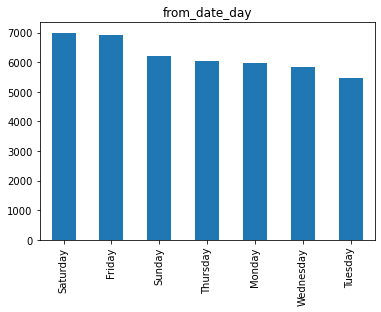

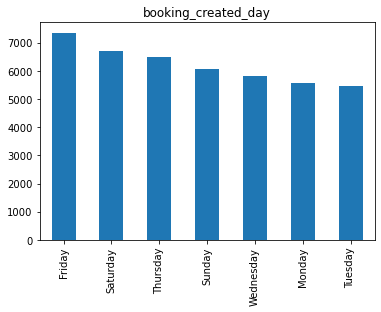

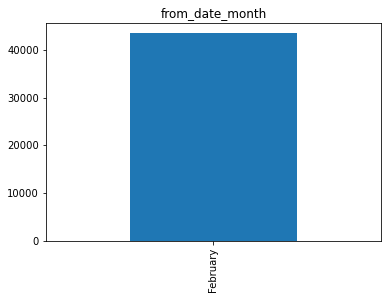

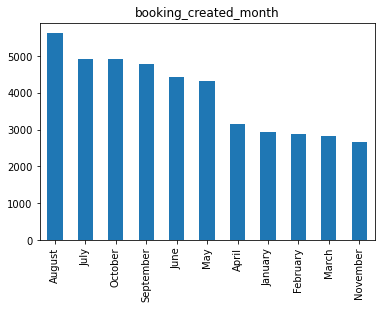

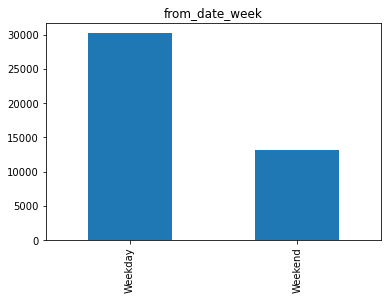

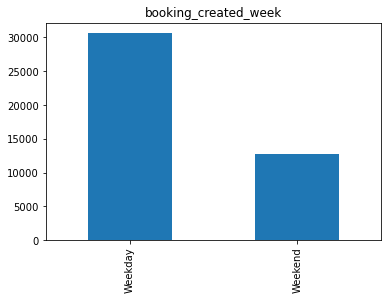

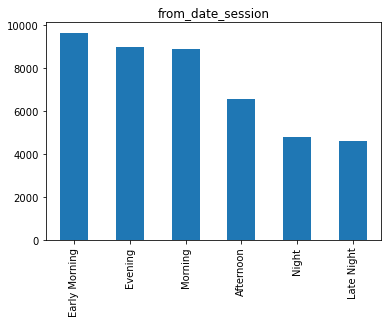

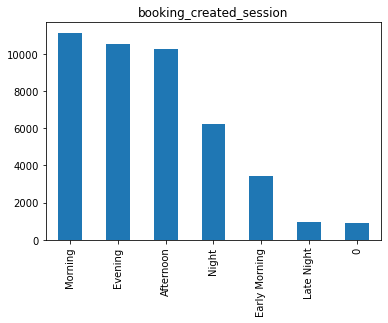

In [20]:
for col in dataset_X.columns:
    if dataset_X[col].dtype == 'object':
        dataset_X[col].value_counts().plot.bar()
        plt.title(col)
        plt.show()

In [21]:
num = dataset_X.select_dtypes(include='number')
char = dataset_X.select_dtypes(include='object')

In [22]:
num

,travel_type_id,online_booking,mobile_site_booking
0,2,0,0
1,2,0,0
2,2,0,0
3,2,0,0
4,2,0,0
...,...,...,...
43426,2,1,0
43427,2,1,0
43428,3,0,0
43429,2,0,0


In [23]:
char

,from_date_day,booking_created_day,from_date_month,booking_created_month,from_date_week,booking_created_week,from_date_session,booking_created_session
0,Tuesday,Tuesday,February,January,Weekday,Weekday,Late Night,Late Night
1,Tuesday,Tuesday,February,January,Weekday,Weekday,Morning,Late Night
2,Tuesday,Tuesday,February,January,Weekday,Weekday,Late Night,Late Night
3,Tuesday,Tuesday,February,January,Weekday,Weekday,Early Morning,Late Night
4,Tuesday,Tuesday,February,January,Weekday,Weekday,Morning,Early Morning
...,...,...,...,...,...,...,...,...
43426,Sunday,Sunday,February,November,Weekend,Weekend,Evening,Afternoon
43427,Tuesday,Sunday,February,November,Weekday,Weekend,Late Night,Afternoon
43428,Sunday,Sunday,February,November,Weekend,Weekend,Evening,Afternoon
43429,Sunday,Sunday,February,November,Weekend,Weekend,Afternoon,Afternoon


In [24]:
X_char = pd.concat([char,dataset_Y],axis=1,join='inner')

In [25]:
X_char

,from_date_day,booking_created_day,from_date_month,booking_created_month,from_date_week,booking_created_week,from_date_session,booking_created_session,Car_Cancellation
0,Tuesday,Tuesday,February,January,Weekday,Weekday,Late Night,Late Night,0
1,Tuesday,Tuesday,February,January,Weekday,Weekday,Morning,Late Night,0
2,Tuesday,Tuesday,February,January,Weekday,Weekday,Late Night,Late Night,0
3,Tuesday,Tuesday,February,January,Weekday,Weekday,Early Morning,Late Night,0
4,Tuesday,Tuesday,February,January,Weekday,Weekday,Morning,Early Morning,0
...,...,...,...,...,...,...,...,...,...
43426,Sunday,Sunday,February,November,Weekend,Weekend,Evening,Afternoon,0
43427,Tuesday,Sunday,February,November,Weekday,Weekend,Late Night,Afternoon,0
43428,Sunday,Sunday,February,November,Weekend,Weekend,Evening,Afternoon,0
43429,Sunday,Sunday,February,November,Weekend,Weekend,Afternoon,Afternoon,0


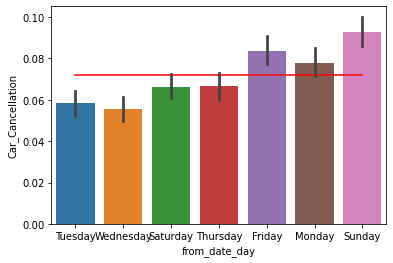

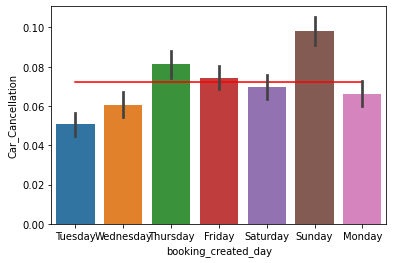

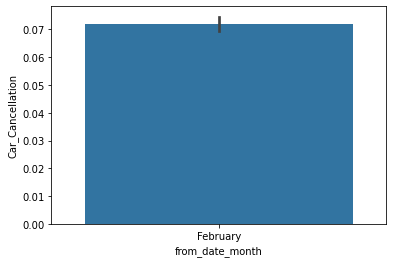

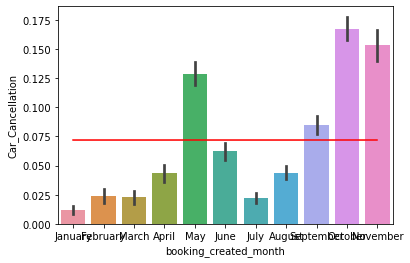

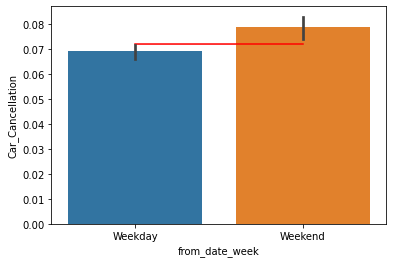

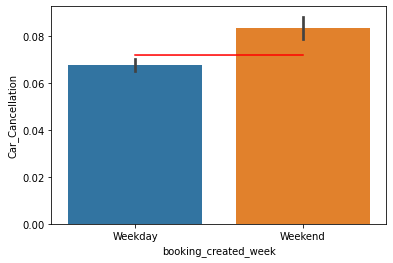

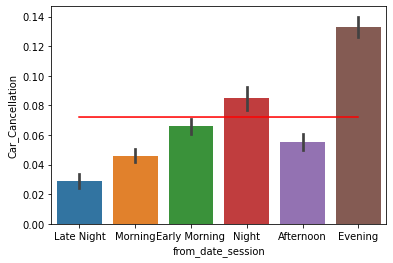

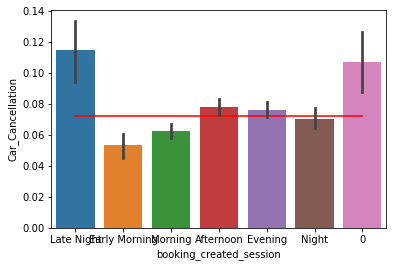

In [26]:
from numpy import mean
import seaborn as sns
for col in (char.columns):
    plt.figure()
    sns.lineplot(x=col, y=X_char['Car_Cancellation'].mean(), data=X_char,estimator=mean, color='red')
    sns.barplot(x=col, y='Car_Cancellation',data=X_char)
plt.show()

In [27]:
X_char_dum = pd.get_dummies(char, drop_first=True)
X_char_dum

,from_date_day_Monday,from_date_day_Saturday,from_date_day_Sunday,from_date_day_Thursday,from_date_day_Tuesday,from_date_day_Wednesday,booking_created_day_Monday,booking_created_day_Saturday,booking_created_day_Sunday,booking_created_day_Thursday,...,from_date_session_Evening,from_date_session_Late Night,from_date_session_Morning,from_date_session_Night,booking_created_session_Afternoon,booking_created_session_Early Morning,booking_created_session_Evening,booking_created_session_Late Night,booking_created_session_Morning,booking_created_session_Night
0,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43426,0,0,1,0,0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0
43427,0,0,0,0,1,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
43428,0,0,1,0,0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0
43429,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [28]:
dataset_all = pd.concat([num,X_char_dum],axis=1,join='inner')

In [29]:
dataset_all

,travel_type_id,online_booking,mobile_site_booking,from_date_day_Monday,from_date_day_Saturday,from_date_day_Sunday,from_date_day_Thursday,from_date_day_Tuesday,from_date_day_Wednesday,booking_created_day_Monday,...,from_date_session_Evening,from_date_session_Late Night,from_date_session_Morning,from_date_session_Night,booking_created_session_Afternoon,booking_created_session_Early Morning,booking_created_session_Evening,booking_created_session_Late Night,booking_created_session_Morning,booking_created_session_Night
0,2,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,2,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
2,2,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
3,2,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,2,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43426,2,1,0,0,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
43427,2,1,0,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
43428,3,0,0,0,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
43429,2,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


# Splitting Dataset into Train And Test Data

In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(dataset_all,dataset_Y,test_size=0.25, random_state=1)

In [31]:
x_train

,travel_type_id,online_booking,mobile_site_booking,from_date_day_Monday,from_date_day_Saturday,from_date_day_Sunday,from_date_day_Thursday,from_date_day_Tuesday,from_date_day_Wednesday,booking_created_day_Monday,...,from_date_session_Evening,from_date_session_Late Night,from_date_session_Morning,from_date_session_Night,booking_created_session_Afternoon,booking_created_session_Early Morning,booking_created_session_Evening,booking_created_session_Late Night,booking_created_session_Morning,booking_created_session_Night
11145,2,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4546,2,0,0,0,1,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
19364,2,0,0,0,1,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
23043,2,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
9496,2,1,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7813,2,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
32511,3,1,0,1,0,0,0,0,0,1,...,1,0,0,0,1,0,0,0,0,0
5192,2,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
12172,2,1,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [32]:
print("x_train Size:",x_train.shape)
print("x_test Size:",x_test.shape)
print("y_train Size:",y_train.shape)
print("y_test Size:",y_test.shape)

x_train Size: (32573, 38)
x_test Size: (10858, 38)
y_train Size: (32573, 1)
y_test Size: (10858, 1)


# Training model

In [33]:
from sklearn.linear_model import LogisticRegression
model_LR = LogisticRegression(random_state=4)
model_LR.fit(x_train,y_train)

C:\Users\rushi\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=4)

In [34]:
from sklearn.metrics import accuracy_score

In [35]:
y_pred = model_LR.predict(x_test)
print('Accuracy of Logistic Regression model is:',accuracy_score(y_test,y_pred) )

Accuracy of Logistic Regression model is: 0.9257690182354025


In [36]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred)


In [37]:
cm

array([[10041,    18],
       [  788,    11]], dtype=int64)

# Making Prediction for booking cancelled due to car unavailability

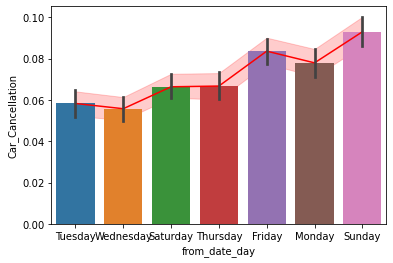

In [38]:
from numpy import mean
import seaborn as sns
plt.figure()
sns.lineplot(x=X_char.from_date_day, y=X_char['Car_Cancellation'],color='red')
sns.barplot(x=X_char.from_date_day, y='Car_Cancellation',data=X_char)
plt.show()